# Script to test out downsampling PSFs
### *11/04/25*

Thinking of a clever way to do this now. Ander suggested interpolation

In [ ]:
import os
import sys

from glob      import glob
from functools import reduce


sys.path.append("/gluster/data/next/software/IC_311024/")
sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
#sys.path.append("/home/e78368jw/Documents/NEXT_CODE/next_misc/")
os.environ['ICTDIR']='/gluster/data/next/software/IC_311024/'

import matplotlib.pyplot as plt
from invisible_cities.io.dst_io import load_dst
from invisible_cities.io.dst_io import df_writer
from invisible_cities.core                import tbl_functions   as tbl


import numpy  as np
import pandas as pd
import tables as tb


import functions_psf as func
%load_ext autoreload
%autoreload 1


def load_psf(file):
    return load_dst(file, "PSF", "PSFs")

In [2]:
import imageio

In [3]:
one_mm_psf = load_psf('/gluster/data/next/files/TOPOLOGY_John/N100_data/14914/prod_psf/eutropia/merged_psfs/final_psf.psf')

In [4]:
display(one_mm_psf)
print(one_mm_psf.xr.unique())

,xr,yr,zr,x,y,z,factor,nevt
0,-499.5,-499.5,0,0.0,0.0,75.0,0.000000,69.0
1,-499.5,-499.5,0,0.0,0.0,175.0,0.000000,64.0
2,-499.5,-499.5,0,0.0,0.0,275.0,0.000006,98.0
3,-499.5,-499.5,0,0.0,0.0,375.0,0.000000,123.0
4,-499.5,-499.5,0,0.0,0.0,475.0,0.000033,108.0
...,...,...,...,...,...,...,...,...
9999995,499.5,499.5,0,0.0,0.0,575.0,0.000047,178.0
9999996,499.5,499.5,0,0.0,0.0,675.0,0.000066,192.0
9999997,499.5,499.5,0,0.0,0.0,775.0,0.000051,196.0
9999998,499.5,499.5,0,0.0,0.0,875.0,0.000000,223.0


[-499.5 -498.5 -497.5 -496.5 -495.5 -494.5 -493.5 -492.5 -491.5 -490.5
 -489.5 -488.5 -487.5 -486.5 -485.5 -484.5 -483.5 -482.5 -481.5 -480.5
 -479.5 -478.5 -477.5 -476.5 -475.5 -474.5 -473.5 -472.5 -471.5 -470.5
 -469.5 -468.5 -467.5 -466.5 -465.5 -464.5 -463.5 -462.5 -461.5 -460.5
 -459.5 -458.5 -457.5 -456.5 -455.5 -454.5 -453.5 -452.5 -451.5 -450.5
 -449.5 -448.5 -447.5 -446.5 -445.5 -444.5 -443.5 -442.5 -441.5 -440.5
 -439.5 -438.5 -437.5 -436.5 -435.5 -434.5 -433.5 -432.5 -431.5 -430.5
 -429.5 -428.5 -427.5 -426.5 -425.5 -424.5 -423.5 -422.5 -421.5 -420.5
 -419.5 -418.5 -417.5 -416.5 -415.5 -414.5 -413.5 -412.5 -411.5 -410.5
 -409.5 -408.5 -407.5 -406.5 -405.5 -404.5 -403.5 -402.5 -401.5 -400.5
 -399.5 -398.5 -397.5 -396.5 -395.5 -394.5 -393.5 -392.5 -391.5 -390.5
 -389.5 -388.5 -387.5 -386.5 -385.5 -384.5 -383.5 -382.5 -381.5 -380.5
 -379.5 -378.5 -377.5 -376.5 -375.5 -374.5 -373.5 -372.5 -371.5 -370.5
 -369.5 -368.5 -367.5 -366.5 -365.5 -364.5 -363.5 -362.5 -361.5 -360.5
 -359.

In [5]:
rebin = 2
display((one_mm_psf.xr // rebin) * rebin)

0         -500.0
1         -500.0
2         -500.0
3         -500.0
4         -500.0
           ...  
9999995    498.0
9999996    498.0
9999997    498.0
9999998    498.0
9999999    498.0
Name: xr, Length: 10000000, dtype: float64

In [ ]:
x = np.array([0,1,2,3,4,5,6,7,8,9,10])
rebin = 5
display((x // 2)*2)

array([ 0,  0,  2,  2,  4,  4,  6,  6,  8,  8, 10])

In [7]:
for i, j in one_mm_psf.groupby(['xr', 'yr', 'z']):
    print(i)
    display(j)
    break

(-499.5, -499.5, 75.0)


,xr,yr,zr,x,y,z,factor,nevt
0,-499.5,-499.5,0,0.0,0.0,75.0,0.0,69.0


In [8]:
# apply rebinning
#rebin = 5

#one_mm_psf['xr'] = (one_mm_psf['xr'] // rebin) * rebin
#one_mm_psf['yr'] = (one_mm_psf['yr'] // rebin) * rebin
#display(one_mm_psf)

In [7]:
display(one_mm_psf.zr.unique())
display(one_mm_psf.x.unique())
display(one_mm_psf.y.unique())

array([0])

array([0.])

array([0.])

# the downsampling

In [8]:
# apply rebinning
rebin = 5

one_mm_psf['xr'] = (one_mm_psf['xr'] // rebin) * rebin
one_mm_psf['yr'] = (one_mm_psf['yr'] // rebin) * rebin

one_mm_psf_downsampled = one_mm_psf.groupby(['xr', 'yr', 'zr', 'x', 'y', 'z']).agg({
                                                      'factor' : 'mean',
                                                      'nevt'   : 'sum'}).reset_index()
display(one_mm_psf_downsampled)

,xr,yr,zr,x,y,z,factor,nevt
0,-500.0,-500.0,0,0.0,0.0,75.0,0.000000,275.0
1,-500.0,-500.0,0,0.0,0.0,175.0,0.000000,298.0
2,-500.0,-500.0,0,0.0,0.0,275.0,0.000022,380.0
3,-500.0,-500.0,0,0.0,0.0,375.0,0.000000,468.0
4,-500.0,-500.0,0,0.0,0.0,475.0,0.000032,471.0
...,...,...,...,...,...,...,...,...
2499995,498.0,498.0,0,0.0,0.0,575.0,0.000012,676.0
2499996,498.0,498.0,0,0.0,0.0,675.0,0.000054,766.0
2499997,498.0,498.0,0,0.0,0.0,775.0,0.000061,790.0
2499998,498.0,498.0,0,0.0,0.0,875.0,0.000002,891.0


# Compare to 5mm PSF

crosscheck* this only applies if you're doing the 5mm downsample

In [9]:
five_mm_psf = load_psf('/gluster/data/next/files/TOPOLOGY_John/N100_data/14914/prod_psf/eutropia/merged_psfs/5mm/final_psf_5mm.psf')

In [10]:
import functions as func

# reimport
one_mm_psf = load_psf('/gluster/data/next/files/TOPOLOGY_John/N100_data/14914/prod_psf/eutropia/merged_psfs/final_psf.psf')


In [11]:
# calculate Delta r
rr_5mm = func.rr_process(five_mm_psf)
rr_5mm_ds = func.rr_process(one_mm_psf_downsampled)
rr_1mm = func.rr_process(one_mm_psf)

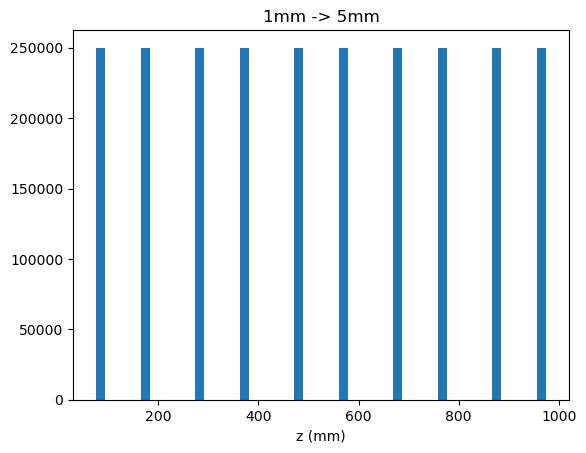

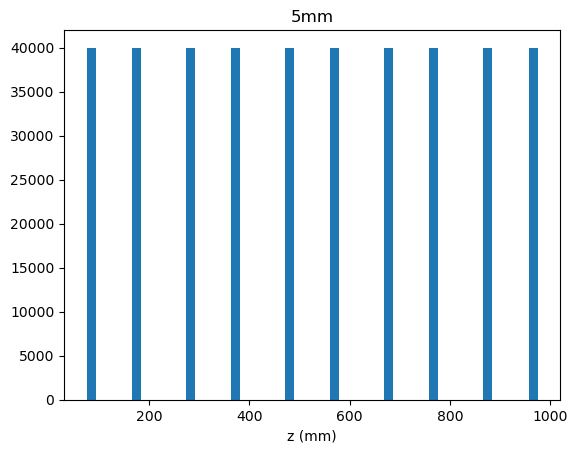

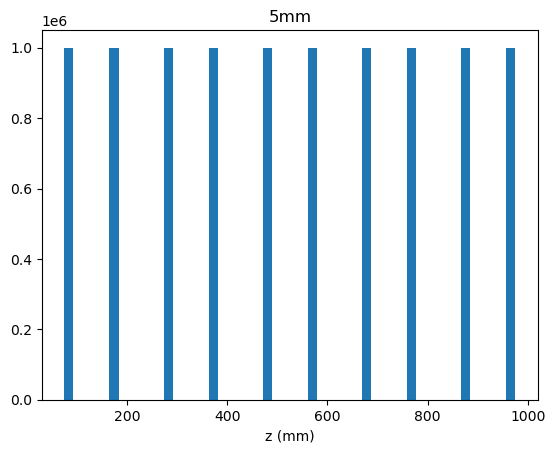

1mm -> 5mm - Z spacing
[ 75. 175. 275. 375. 475. 575. 675. 775. 875. 975.]

1mm - Z spacing
[ 75. 175. 275. 375. 475. 575. 675. 775. 875. 975.]



In [12]:
func.plot_z_bins(one_mm_psf_downsampled, 50, '1mm -> 5mm')
func.plot_z_bins(five_mm_psf, 50, '5mm')
func.plot_z_bins(one_mm_psf, 50, '5mm')


print('1mm -> 5mm - Z spacing')
print(one_mm_psf_downsampled.z.unique())
print('========================\n')
print('1mm - Z spacing')
print(five_mm_psf.z.unique())
print('========================\n')


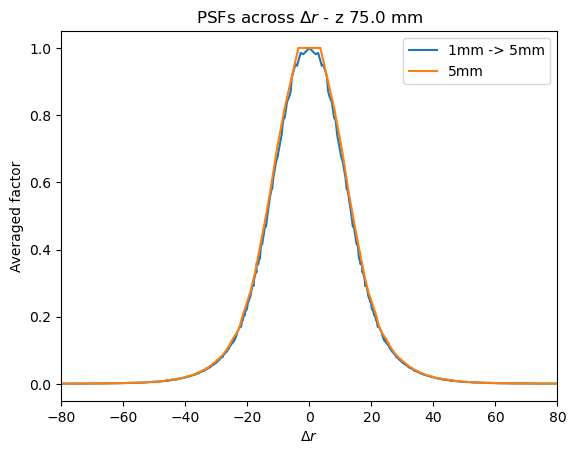

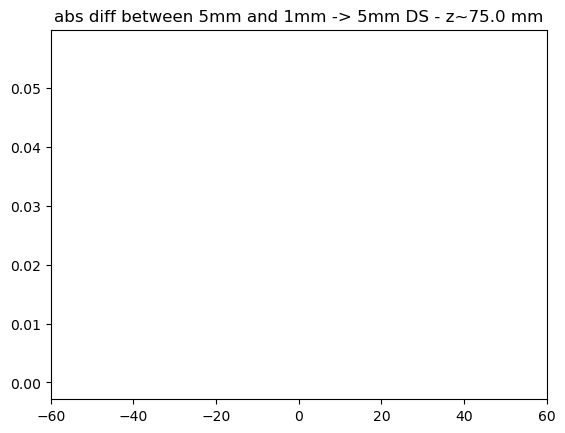

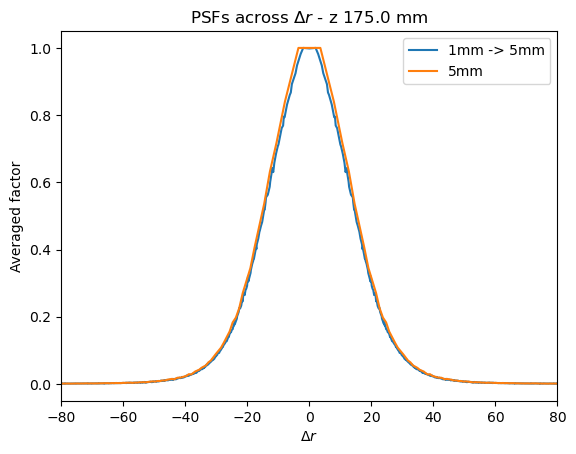

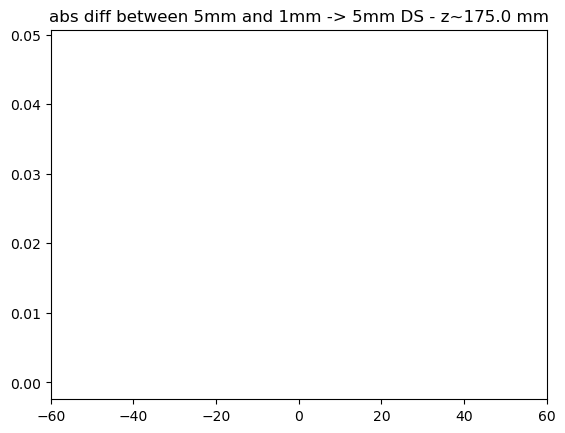

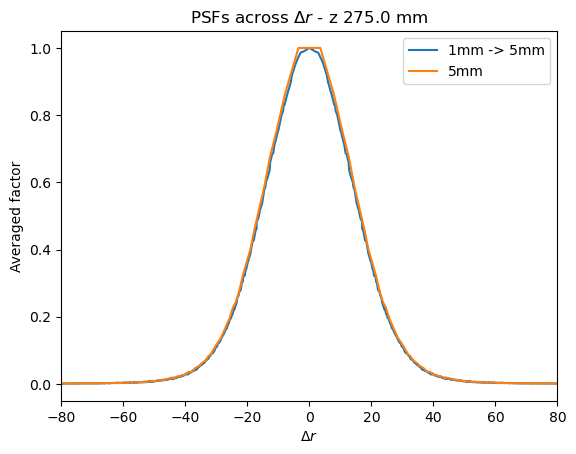

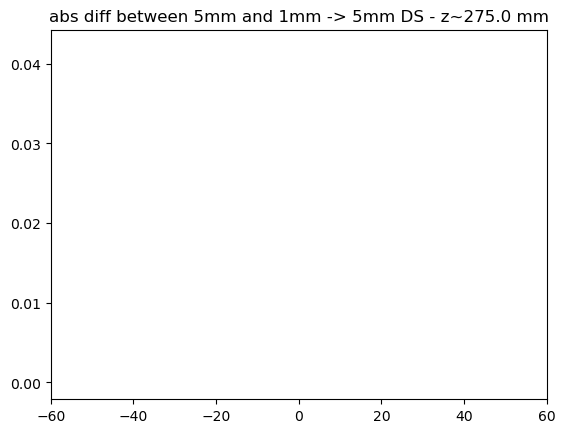

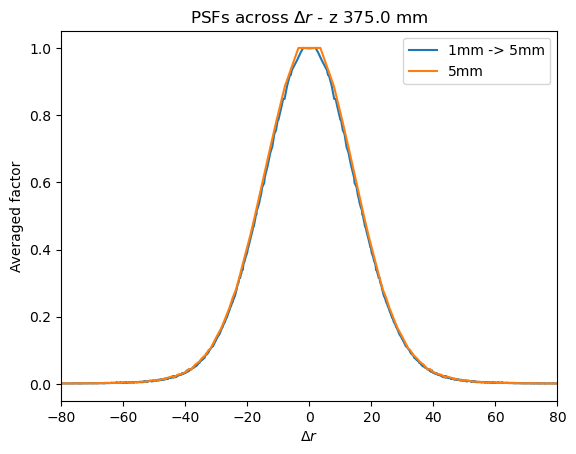

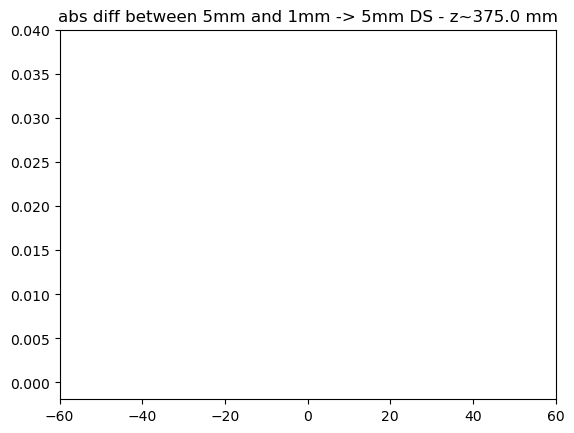

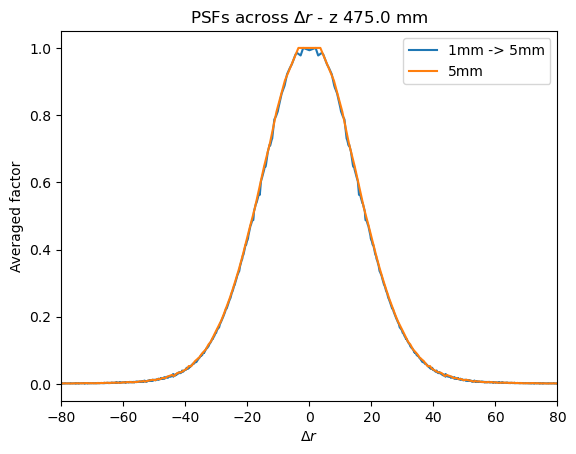

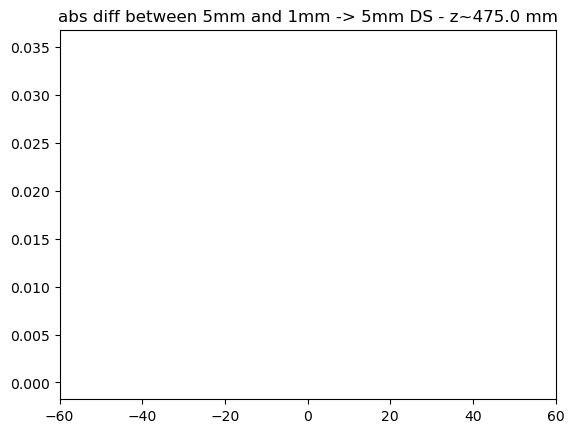

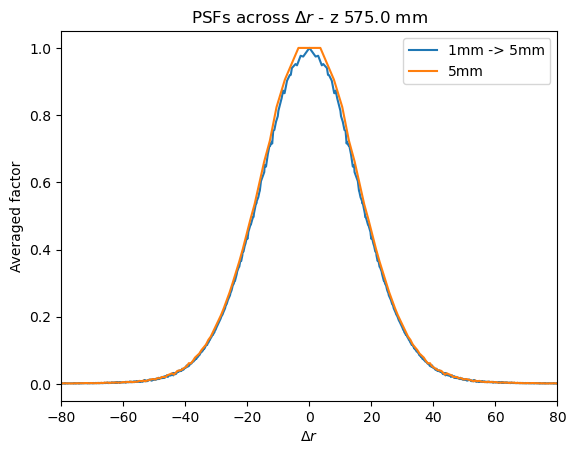

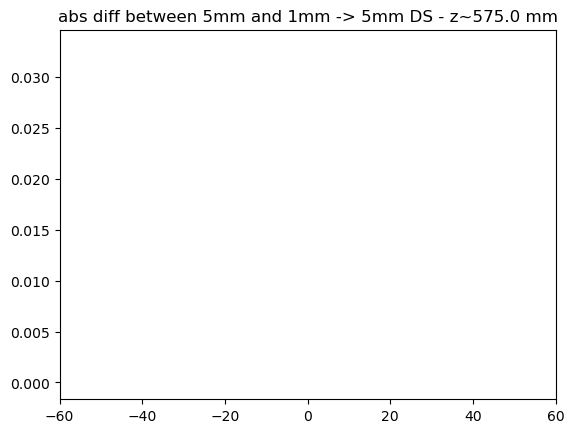

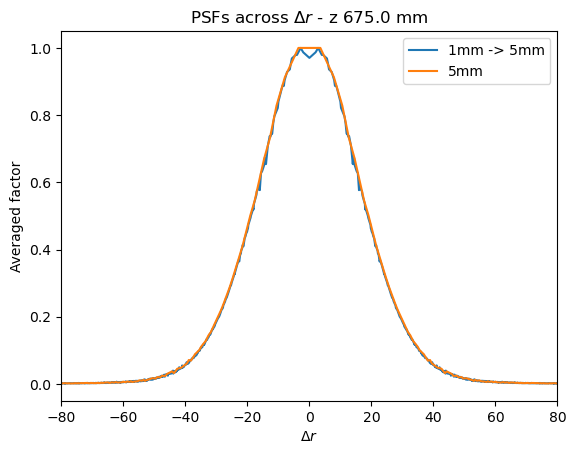

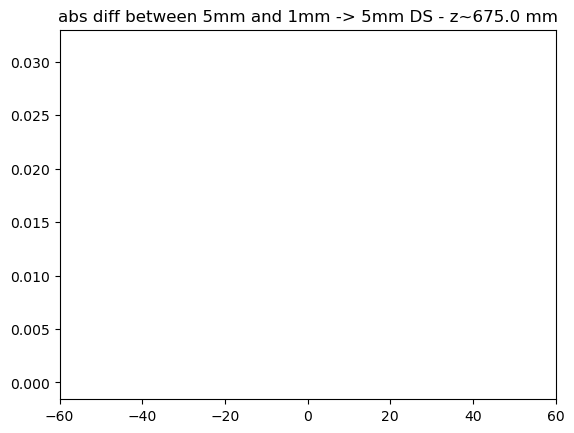

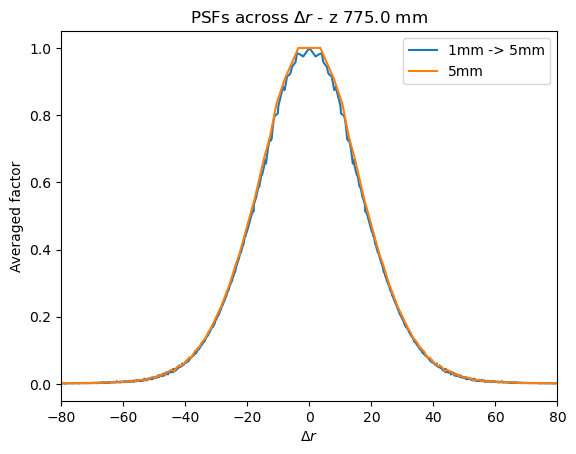

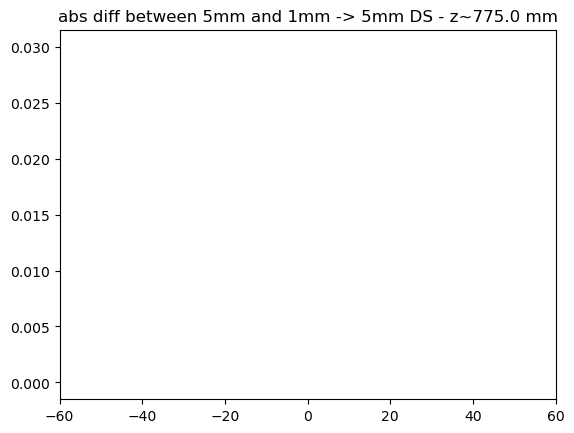

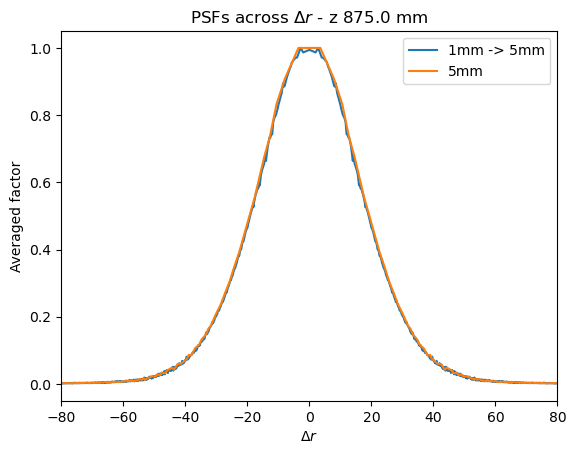

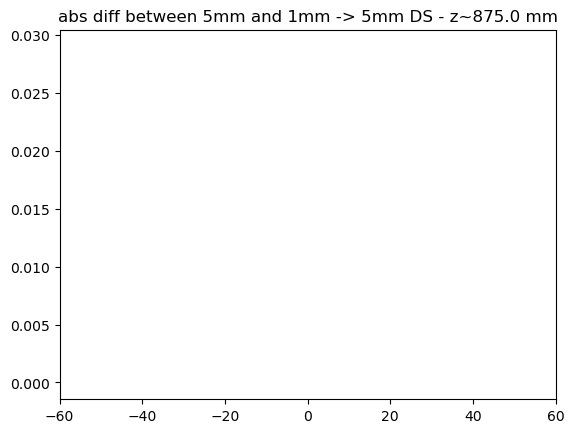

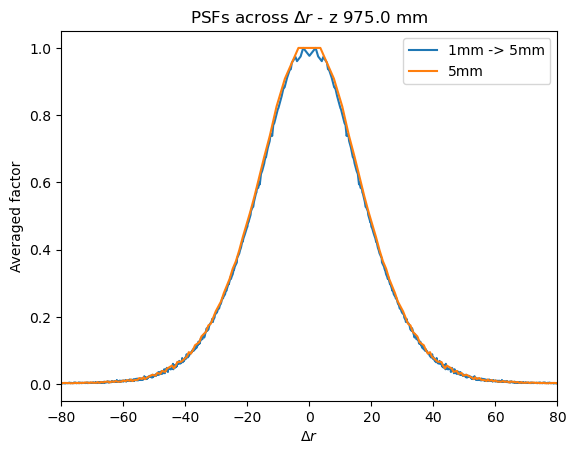

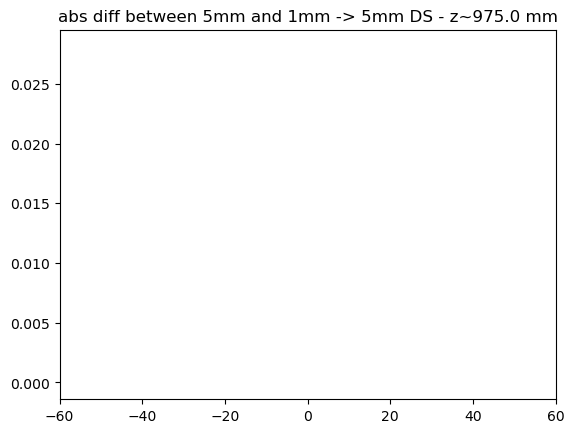

In [13]:
norm = True
for z in one_mm_psf_downsampled.z.unique():
    func.create_plots_psf(one_mm_psf_downsampled, z, f'1mm -> 5mm', norm)
    func.create_plots_psf(five_mm_psf, z, f'5mm', norm)
    #func.create_plots_psf(one_mm_psf, z, f'1mm', norm)
    ## one mm psf
    plt.xlabel("$\Delta r$")
    plt.ylabel("Averaged factor")
    plt.xlim([-80, 80])
    #plt.yscale('log')
    plt.legend()
    plt.title(f"PSFs across $\Delta r$ - z {z} mm")
    plt.savefig(f'gif/z_psf_{z}.png')
    plt.show()

    df_diff = one_mm_psf_downsampled.copy(deep=True)
    df_diff['factor'] = abs(five_mm_psf.factor - one_mm_psf_downsampled.factor)

    
    func.create_plots_psf(df_diff, z, 'diff', False)
    plt.title(f'abs diff between 5mm and 1mm -> 5mm DS - z~{z} mm')
    plt.xlim([-60, 60])
    plt.savefig(f'gif/diff/z_psf_{z}.png')
    plt.show()


In [37]:
files = [f for f in os.listdir('gif/') if os.path.isfile(os.path.join('gif/', f))]
#sort files in a human manner
files.sort(key=func.alphanum_key)
images = []
for filename in files:
    images.append(imageio.imread('gif/' + filename))

print("Creating gif...")
gif_name = f'plots/psf.gif'
imageio.mimsave(gif_name, images, loop = 0, fps = 3)

/tmp/ipykernel_3519/1338116422.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread('gif/' + filename))


Creating gif...


In [38]:
files = [f for f in os.listdir('gif/diff/') if os.path.isfile(os.path.join('gif/', f))]
#sort files in a human manner
files.sort(key=func.alphanum_key)
images = []
for filename in files:
    images.append(imageio.imread('gif/diff/' + filename))

print("Creating gif...")
gif_name = f'plots/psf_diff.gif'
imageio.mimsave(gif_name, images, loop = 0, fps = 3)

/tmp/ipykernel_3519/4063448897.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread('gif/diff/' + filename))


Creating gif...


In [ ]:
file = '/gluster/data/next/files/TOPOLOGY_John/N100_data/14914/prod_psf/eutropia/merged_psfs/downsampled_psf_5mm.psf'
compression = 'ZLIB4'
with tb.open_file(file, "w", filters = tbl.filters(compression)) as h5out:

    df_writer(h5out,   one_mm_psf_downsampled, "PSF", "PSFs" , compression="ZLIB4")

#one_mm_psf_downsampled.to_hdf()

# Function to do it for you

In [45]:
def downsample_PSF(PSF_c, binning):
    # apply rebinning

    PSF = PSF_c.copy(deep = True)

    PSF['xr'] = (PSF['xr'] // binning) * binning
    PSF['yr'] = (PSF['yr'] // binning) * binning

    psf_downsampled = PSF.groupby(['xr', 'yr', 'zr', 'x', 'y', 'z']).agg({
                                                          'factor' : 'mean',
                                                          'nevt'   : 'sum'}).reset_index()
    return psf_downsampled

In [56]:
import functions as func

# reimport
one_mm_psf = load_psf('/gluster/data/next/files/TOPOLOGY_John/N100_data/14914/prod_psf/eutropia/merged_psfs/final_psf.psf')


In [57]:
psf_2_5mm = downsample_PSF(one_mm_psf, 2.5)
display(psf_2_5mm.xr.unique()[:10])
display(one_mm_psf.xr.unique()[:10])

array([-500. , -497.5, -495. , -492.5, -490. , -487.5, -485. , -482.5,
       -480. , -477.5])

array([-499.5, -498.5, -497.5, -496.5, -495.5, -494.5, -493.5, -492.5,
       -491.5, -490.5])

In [58]:
rr_2mm = func.rr_process(psf_2_5mm)
rr_1mm = func.rr_process(one_mm_psf)

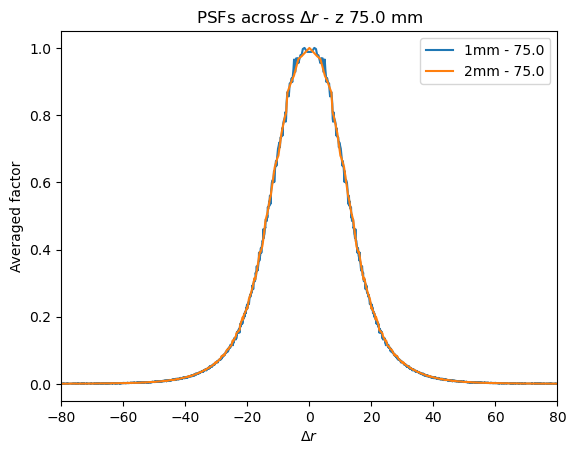

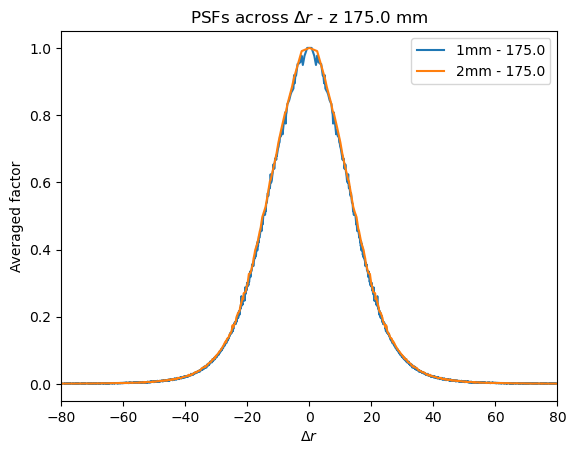

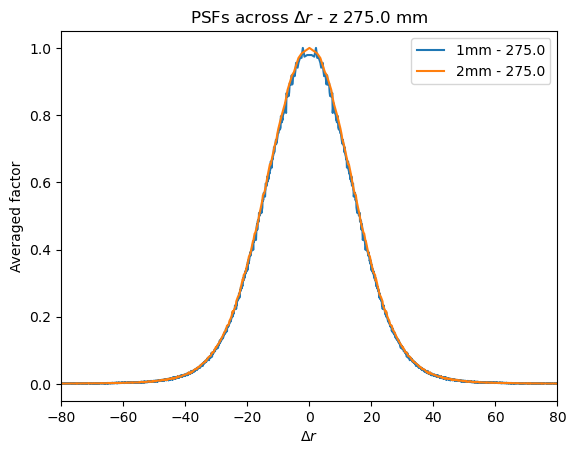

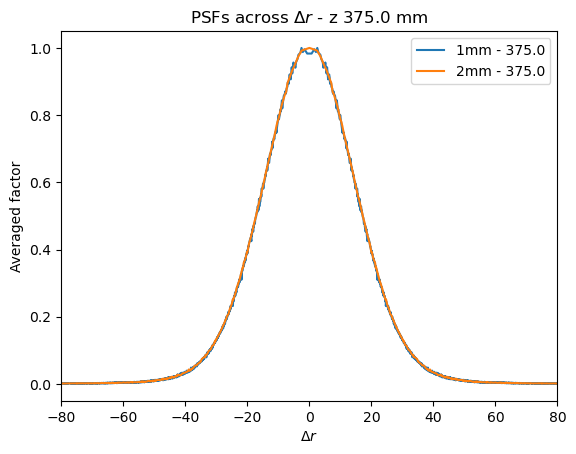

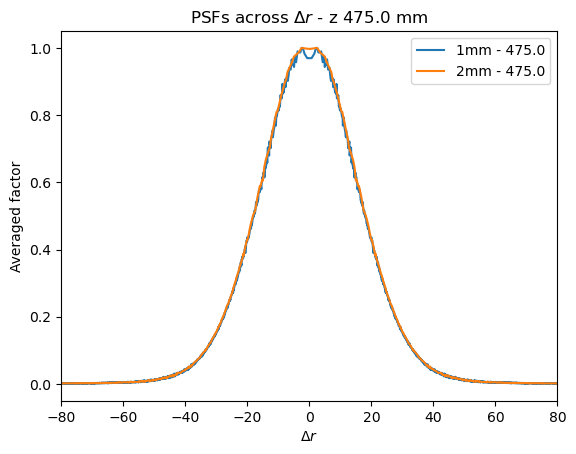

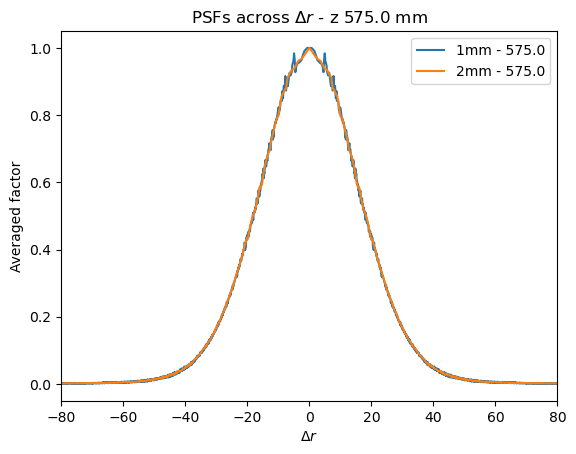

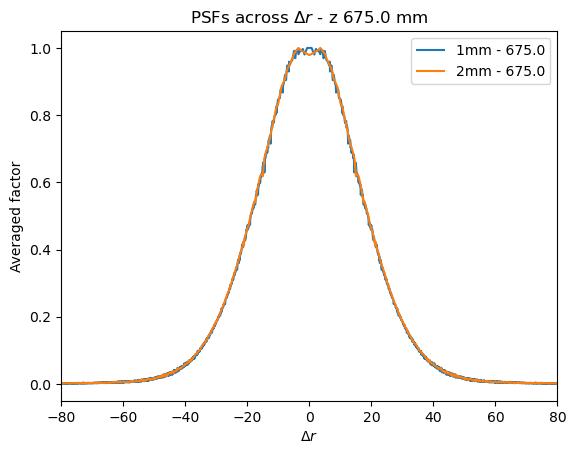

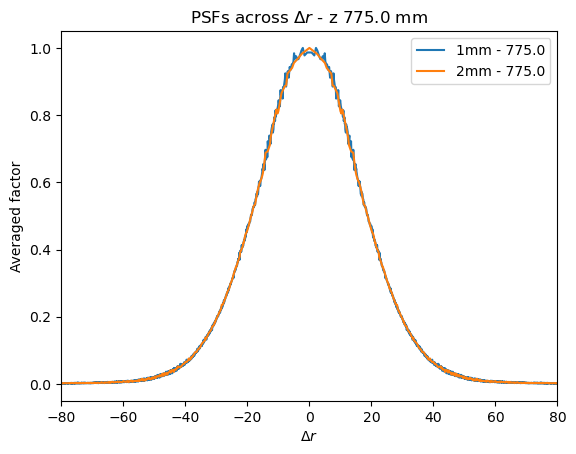

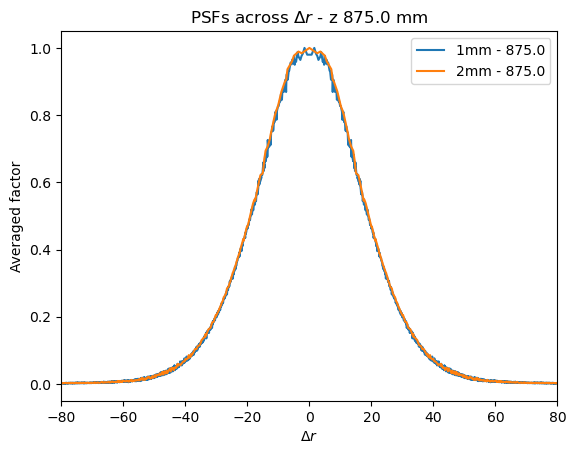

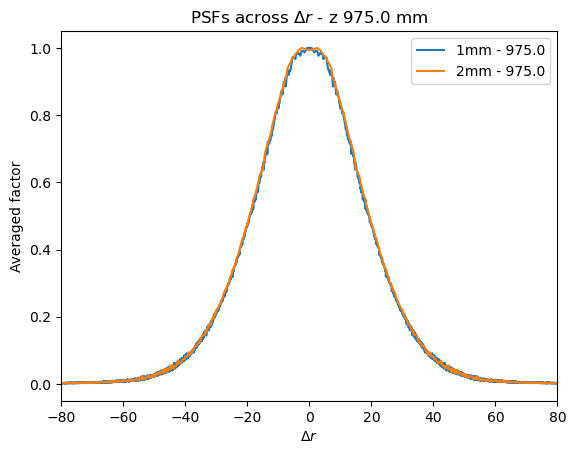

In [59]:
for z in one_mm_psf.z.unique():
    func.create_plots_psf(one_mm_psf, z, f'1mm - {z}', norm)
    func.create_plots_psf(psf_2_5mm, z, f'2mm - {z}', norm)
    #func.create_plots_psf(one_mm_psf, z, f'1mm', norm)
    ## one mm psf
    plt.xlabel("$\Delta r$")
    plt.ylabel("Averaged factor")
    plt.xlim([-80, 80])
    #plt.yscale('log')
    plt.legend()
    plt.title(f"PSFs across $\Delta r$ - z {z} mm")
    plt.show()


In [60]:
# save the 2 mm PSF
file = '/gluster/data/next/files/TOPOLOGY_John/N100_data/14914/prod_psf/eutropia/merged_psfs/downsampled_psf_2point5mm.psf'
compression = 'ZLIB4'
with tb.open_file(file, "w", filters = tbl.filters(compression)) as h5out:

    df_writer(h5out,   psf_2_5mm, "PSF", "PSFs" , compression="ZLIB4")
